## Observations and Insights 

In [1]:
# The correlation between weight and average tumor volume of Mice with Capomulin treatment is strong and positive.
    # Infubinol and Ceftamin treatments have higher median final tumor volumes than the other two treatments analyzed.
    # Mouse b128's Tumor Volume generally decreased over time with Capomulin treatment
# Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
# Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study.
# There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
# There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study.
# 1. The bar graph showed the Drug Regimen Capomulin has the maximum mice number (230), and Zoniferol has the smaller mice number (182).By removing duplicates the total number of mice is 248. The total count of mice by gender also showed that 124 female mice and 125 male mice.
# 2. The correlation between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation, when the mouse weight increases the average tumor volume also increases.
# 3. The regression analysis helped us to understand how much the average tumor volume (dependent variable) will change when weight of mice change(independent variables). The R-squared value is 0.70, which means 70% the model fit the data, wich is fairely good to predict the data from the model. Higher R-squared values represent smaller differences between the observed data, and the fitted value. 70% the model explains all of the variation in the response variable around its mean.
# 4. From the selected treatments Capomulin and Ramicane reduces the size of tumors better.
# There was a strong, positive correlation between a mouse's weight and average tumor volume in the Capomulin trials (heavier mice tended to have larger tumors).

# Data taken from male and female mice was about even, with only a 1.2% difference between the two sets.

# Of the four specified drug regimens, Capomulin and Ramicane had the least average tumor volumes with less variance, likely making them the better treatment options over Infubinol and Ceftamin.
# The bar graph showed the Drug Regimen Capomulin has the maximum mice number (230), and Zoniferol has the smaller mice number (182).By removing duplicates the total number of mice is 248. The total count of mice by gender also showed that 124 female mice and 125 male mice.
# The correlation between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation, when the mouse weight increases the average tumor volume also increases.
# The regression analysis helped to understand how much the average tumor volume (dependent variable) will change when weight of mice change(independent variables). The R-squared value is 0.70, which means 70% the model fit the data, wich is fairely good to predict the data from the model. Higher R-squared values represent smaller differences between the observed data, and the fitted value. 70% the model explains all of the variation in the response variable around its mean.
# From the selected treatments Capomulin and Ramicane reduces the size of tumors better.

# Refer to bar chart of mice per drug regimen, there are 10 treatments in the study. The highest number of study is treated by Capomulin. On the other hand, the lowest number of study is treated by Propriva. This means the study focused toward Capomulin compared to other treatments.

# Refer to the distribution of mouse's sex across all the treatment, there are more male mice treated than female mice. However, the statistics shows only 2% difference. Sex might not be the significant variable to the study.

# Refer to box plot across 4 regimens of interest and the summary statistics table, final tumor volume treated by Capomulin and Ramicane tend to have lower number than the others. Ramicane seems to have lower final tumor volume. However, the number of mice treated by Ramicane is slightly less than Capomulin. To retrieve more accurate study and conclusion, the treatment of both regimens might be continued with the same number of mice.

# Mouse ID l509 is an example of mouse treated by Capomulin, the tumor volume seems to decrease when the time has passed. Also, samples chart of 5 mice treated in the same regimen supports the assumption that Capomulin could reduce the size of tumor volumn.

# Refer to Capomulin's correlation between average weight and final tumor volumn which is 0.84, that means there is a relation between 2 variables. Also, the r-squared 0.71 could infer that the final tumor volume could be predictable by using average weight of mouse.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# CSV Data files
mouse_metadata_path = "Resources/mouse_metadata.csv"
study_results_path = "Resources/study_results.csv"

# Read csv files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Display original mouse dataset 

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# Display original study results dataset

study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine csv file dataframes into a single dataframe
study_data_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how='outer')

# Display the data table for preview
study_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Drop Duplicates

# Create df with only necessary columns
mouse_demographic = study_data_df.loc[:,['Mouse ID', 'Timepoint']]
mouse_demographic.head()

# Use drop_duplicates to remove any rows with duplicate mouse ID & timepoint
study_data_cleaned = mouse_demographic.drop_duplicates()
study_data_cleaned

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [7]:
# Count of unique mice
mouse_count = mouse_demographic["Mouse ID"].nunique()

# Convert to dataframe
mouse_count_df = pd.DataFrame({"Total Unique Mice":[mouse_count]})

# Display mouse count dataframe
mouse_count_df

,Total Unique Mice
0,249


In [8]:
# Display duplicate (Mouse ID and Timepoint) mouse by ID number 
dup_mice_ID = study_data_df.loc[study_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [9]:
# Show data for the duplicate mouse ID
dup_mice_df = study_data_df.loc[study_data_df["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_mice_df = study_data_df[study_data_df['Mouse ID'].isin(dup_mice_ID)==False]
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Number of mice in the clean DataFrame.
clean_mice = clean_mice_df["Mouse ID"].nunique()
clean_mice

248

## Summary Statistics

In [12]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume

drug_regimen_mean = clean_mice_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
drug_regimen_median = clean_mice_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
drug_regimen_variance = clean_mice_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
drug_regimen_std = clean_mice_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
drug_regimen_sem = clean_mice_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe
drug_regimen_stats = pd.DataFrame({"Mean Tumor Volume": drug_regimen_mean,
                                   "Median Tumor Volume": drug_regimen_median,
                                   "Tumor Volume Variance": drug_regimen_variance,
                                   "Tumor Volume STD": drug_regimen_std,
                                   "Tumor Volume SEM": drug_regimen_sem})
                                  
# Clean and format data
drug_regimen_stats["Mean Tumor Volume"] = drug_regimen_stats["Mean Tumor Volume"].map("{:,.2f}".format)
drug_regimen_stats["Median Tumor Volume"] = drug_regimen_stats["Median Tumor Volume"].map("{:,.2f}".format)
drug_regimen_stats["Tumor Volume Variance"] = drug_regimen_stats["Tumor Volume Variance"].map("{:,.2f}".format) 
drug_regimen_stats["Tumor Volume STD"] = drug_regimen_stats["Tumor Volume STD"].map("{:,.2f}".format)
drug_regimen_stats["Tumor Volume SEM"] = drug_regimen_stats["Tumor Volume SEM"].map("{:,.2f}".format)   
                                  
# Display drug regimen dataframe
drug_regimen_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [13]:
# Using the aggregation method, produce the same summary statistics from a single line of code
drug_regimen_agg = clean_mice_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var',
                                                                                         'std', 'sem']).round(2)
drug_regimen_agg

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

In [14]:
# Generate a bar plot using both Pandas's DataFrame.plot() that shows the total number of measurements taken 
# for each treatment regimen throughout the course of the study

In [15]:
#Groupby drug regimen with .count and mouse id to determine the total measurement datapoints

regimen_data_points = clean_mice_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_data_points

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

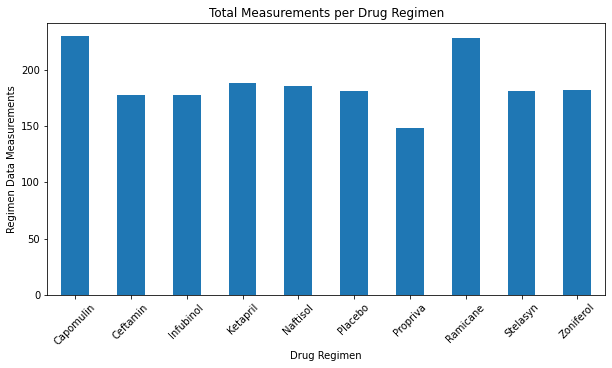

<Figure size 432x288 with 0 Axes>

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas

regimen_data_points.plot(kind="bar", figsize=(10,5))

#set chart title
plt.title("Total Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Regimen Data Measurements")

#show chart and set layout
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()

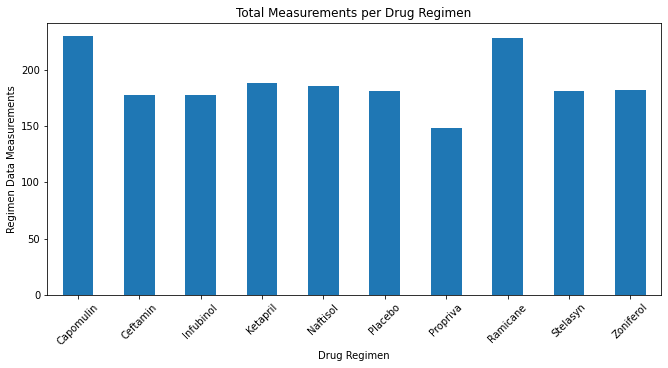

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot
   
plt.figure(figsize=(11,5))       
plt.bar(regimen_data_points.index, regimen_data_points, width=0.5, align="center")
plt.xticks(rotation=45)
plt.xlim(-0.5,9.5)
plt.title("Total Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Regimen Data Measurements")
plt.show()

In [18]:
# Distribution of female and male mice in the study

# Group by gender 
groupby_gender = clean_mice_df.groupby(["Mouse ID","Sex"])
gender_df = pd.DataFrame(groupby_gender.size())

# Total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# Percentage of female vs male
mouse_gender["Percentage of Sex"] = ((mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# Format "Percentage of Sex" column
mouse_gender['Percentage of Sex'] = mouse_gender['Percentage of Sex'].map("{:,.2%}".format)

# Display gender distribution dataframe
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,123,49.60%
Male,125,50.40%


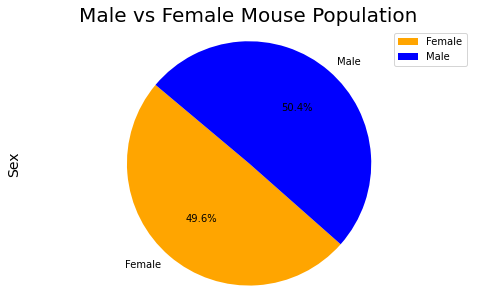

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

colors = ['orange', 'blue']
plot = mouse_gender.plot.pie(y='Total Count',figsize=(8,5), colors = colors, startangle=140, autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
plt.axis("equal")
plt.show()

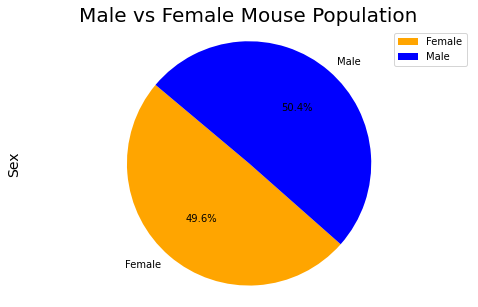

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplo

# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.6,50.4]

#Set colors for each section of the pie
colors = ['orange', 'blue']

#Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(8, 5))
plt.pie(sizes,labels=labels, colors=colors, autopct="%1.1f%%", startangle=140,)
plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
plt.legend(loc="best")
#Set equal axis
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Capomulin", :]
Ramicane_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
max_tp = clean_mice_df.groupby(["Mouse ID"])['Timepoint'].max()
max_tp = max_tp.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tp.merge(clean_mice_df,on=['Mouse ID','Timepoint'],how="left")
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [44]:
# Calculate quartiles and IQR

# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []

for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset to tumor_vol_list 
    final_tumor_vol_list.append(final_tumor_vol)
    
     # Set up variables
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq  
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
  
    print(f"{drug} Regimen")
    print(f"The lower quartile of {drug} tumors: {lowerq}")
    print(f"The upper quartile of {drug} tumors: {upperq}")
    print(f"The interquartile range of {drug} tumors: {iqr}")
    print(f"The median of {drug} tumors: {quartiles[0.5]} ")
    print('----------------------------------------------------------') 

Capomulin Regimen
The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
----------------------------------------------------------
Ramicane Regimen
The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
----------------------------------------------------------
Infubinol Regimen
The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
----------------------------------------------------------
Ceftamin Regimen
The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The interqua

In [27]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []

for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset to tumor_vol_list 
    final_tumor_vol_list.append(final_tumor_vol)
    
    # Set up variables
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq  
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) 
                  | (final_tumor_vol > upper_bound)]
    
    # Print out the result
    print(f"{drug} Regimen")
    print(f"Final tumor volume(mm3) for {drug} below {round(lower_bound,2)} could be outliers.")
    print(f"Final tumor volume(mm3) for {drug} above {round(upper_bound,2)} could be outliers.")
    print(f"Number of outliers for {drug} is: {outliers.count()}")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f'Outlier final tumor volume(mm3) is {round(outliers[i], 2)}')
    print('----------------------------------------------------------')


Capomulin Regimen
Final tumor volume(mm3) for Capomulin below 20.7 could be outliers.
Final tumor volume(mm3) for Capomulin above 51.83 could be outliers.
Number of outliers for Capomulin is: 0
----------------------------------------------------------
Ramicane Regimen
Final tumor volume(mm3) for Ramicane below 17.91 could be outliers.
Final tumor volume(mm3) for Ramicane above 54.31 could be outliers.
Number of outliers for Ramicane is: 0
----------------------------------------------------------
Infubinol Regimen
Final tumor volume(mm3) for Infubinol below 36.83 could be outliers.
Final tumor volume(mm3) for Infubinol above 82.74 could be outliers.
Number of outliers for Infubinol is: 1
Outlier final tumor volume(mm3) is 36.32
----------------------------------------------------------
Ceftamin Regimen
Final tumor volume(mm3) for Ceftamin below 25.36 could be outliers.
Final tumor volume(mm3) for Ceftamin above 87.67 could be outliers.
Number of outliers for Ceftamin is: 0
-----------

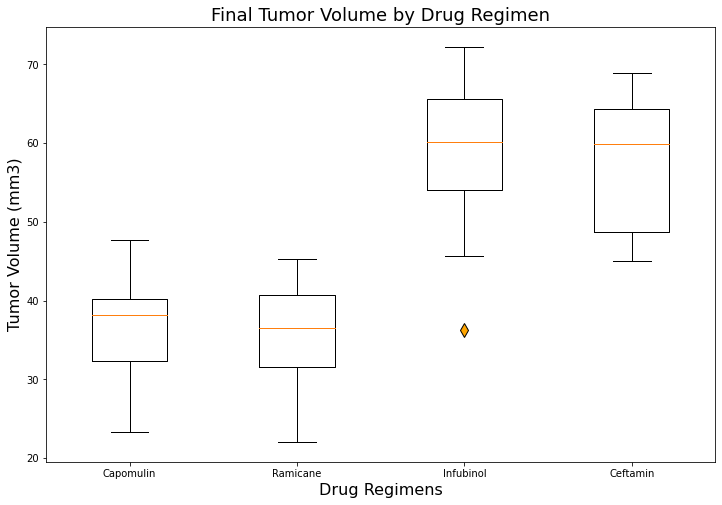

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Final Tumor Volume by Drug Regimen', fontsize=18)
ax1.set_ylabel('Tumor Volume (mm3)', fontsize=16)
ax1.set_xlabel('Drug Regimens', fontsize=16)
ax1.boxplot(final_tumor_vol_list, flierprops = dict(markerfacecolor='orange', marker='d', markersize='10'))
ax1.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

In [36]:
# Calculate tumor volume vs. time point for a mouse treated with Capomulin

forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "m957",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]
forline_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
135,m957,Capomulin,Female,3,19,0,45.000000,0
136,m957,Capomulin,Female,3,19,5,45.622381,1
137,m957,Capomulin,Female,3,19,10,46.414518,1
138,m957,Capomulin,Female,3,19,15,39.804453,1
139,m957,Capomulin,Female,3,19,20,38.909349,1
140,m957,Capomulin,Female,3,19,25,37.695432,1
141,m957,Capomulin,Female,3,19,30,38.212479,1
142,m957,Capomulin,Female,3,19,35,32.562839,1
143,m957,Capomulin,Female,3,19,40,32.947615,1
144,m957,Capomulin,Female,3,19,45,33.329098,1


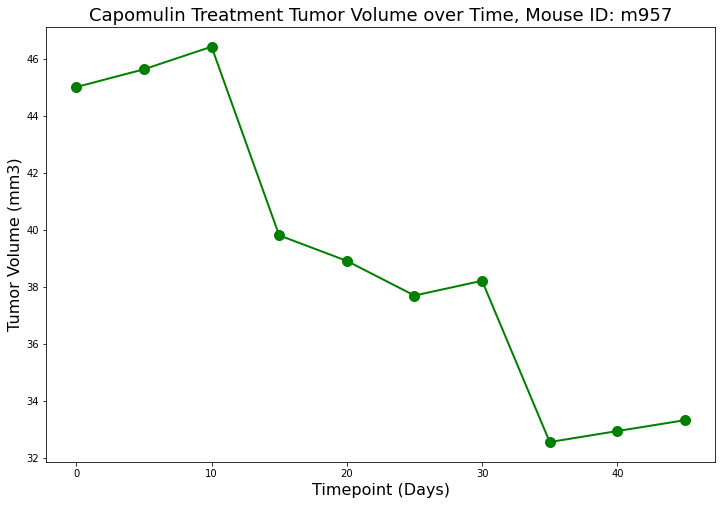

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.title('Capomulin Treatment Tumor Volume over Time, Mouse ID: m957', fontsize=18)
plt.plot(x_axis, tumsiz,linewidth=2, markersize=10,marker="o",color="green")
plt.xlabel('Timepoint (Days)', fontsize=16)
plt.ylabel('Tumor Volume (mm3)', fontsize=16)
plt.show()

In [38]:
# Calculate average tumor volume vs. mouse weight for the Capomulin regimen
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()
avg_capm_vol

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


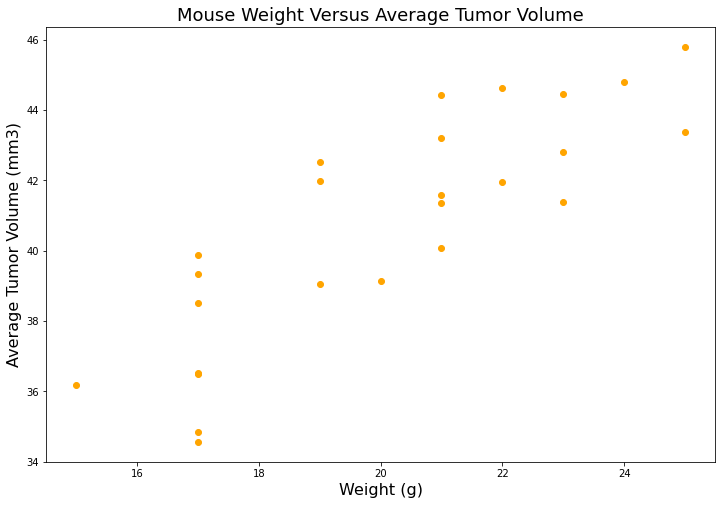

In [39]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="orange")
plt.title('Mouse Weight Versus Average Tumor Volume', fontsize=18)
plt.xlabel('Weight (g)',fontsize =16)
plt.ylabel('Average Tumor Volume (mm3)',fontsize=16)
plt.show()

## Correlation and Regression

In [40]:
# Calculate the correlation and regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


The linear regression (r-squared) is: 0.709


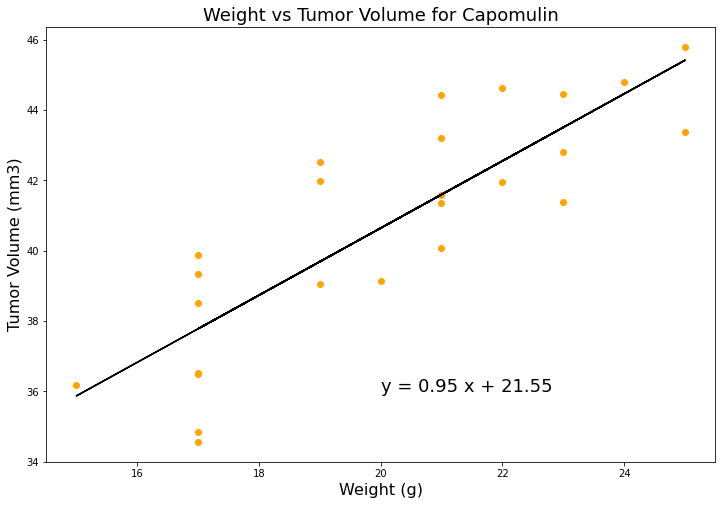

In [41]:
# Add the linear regression equation and line to plot
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
fig2, ax1 = plt.subplots(figsize=(12, 8))
(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='orange')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='black')
plt.annotate(line_eq,(20,36), fontsize=18)
plt.xlabel("Weight (g)", fontsize=16)
plt.ylabel("Tumor Volume (mm3)", fontsize=16)
plt.title("Weight vs Tumor Volume for Capomulin", fontsize=18)
print(f"The linear regression (r-squared) is: {round(rvalue**2,3)}")
plt.show()